In [13]:
import pandas as pd
import os
import numpy as np
from src import constants, util

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Go through all articles and get the aspects we are interested in
# This runs for a bit.
features = list()

text_base_path = os.environ["DATA_PATH"] + "/interim/articles_text/"

# TODO build an iterator in src/data/article_text.py (also for websites)
for text_path, _, text_files in os.walk(text_base_path):
    for text_file in text_files:
        # We don't want any misc files like .DS_STORE
        if text_file.endswith(".gzip"):
            text_file_path = os.path.join(text_path, text_file)
            text = util.load_gzip_text(text_file_path)
            features.append(len(text))

In [15]:
# Check if there are any articles that have length 0
len(features)

220421

In [16]:
np.average(features)

4424.202562369284

In [17]:
# Many are empty, which is bad
len(list(filter(lambda x: x < 1, features)))

631

In [18]:
# But not many more have very little content, which is good
len(list(filter(lambda x: x < 100, features)))

782

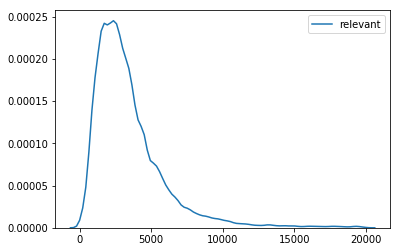

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots()
features_cleaned = list(filter(lambda x: 0 < x < 20000, features))
sns.kdeplot(data=features_cleaned, ax=ax, label="relevant")
plt.show()

In [28]:
len(list(filter(lambda x: x > 20000, features)))

5122

In [37]:
def test():
    for text_path, _, text_files in os.walk(text_base_path):
        for text_file in text_files:
            # We don't want any misc files like .DS_STORE
            if text_file.endswith(".gzip"):
                text_file_path = os.path.join(text_path, text_file)
                text = util.load_gzip_text(text_file_path)
                if len(text) < 100:
                    print(len(text))
                    print(text_file_path)
                    return
test()

0
/Volumes/DeskDrive/data//interim/articles_text/com/alcaudulloyour-daily-explore-360-vr-fix-nascar-in-vr-strategy-science-and-speed-at-sonoma-raceway.gzip
